In [2]:
from itertools import count
from statistics import geometric_mean
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


Abrimos las bases de datos "resultados_paso" y "circuitos_electorales"(una base descargada del GCBA que usaremos para vincular circuitos electorales con comunas)

In [3]:
resultados_paso = pd.read_csv(
    "paso_x_partido.csv" "",
    delimiter=",",  # delimitador ',',';','|','\t'
    header=0,  # número de fila como nombre de columna
    names=None,  # nombre de las columnas (ojo con header)
    index_col=0,  # que col es el índice
    usecols=None,  # que col usar. Ej: [0, 1, 2], ['foo', 'bar', 'baz']
    dtype=None,  # Tipo de col {'a': np.int32, 'b': str}
    skiprows=None,  # saltear filas al inicio
    skipfooter=0,  # saltear filas al final
    nrows=None,  # n de filas a leer
    decimal=".",  # separador de decimal. Ej: ',' para EU dat
    quotechar='"',  # char para reconocer str
    encoding=None,
)

resultados_paso  # archivos con tilde y ñ por lo general utilizan "utf-8" etc
#%%
comunas = pd.read_csv(
    "circuitos-electorales.csv",
    delimiter=",",  # delimitador ',',';','|','\t'
    header=0,  # número de fila como nombre de columna
    names=None,  # nombre de las columnas (ojo con header)
    index_col=0,  # que col es el índice
    usecols=None,  # que col usar. Ej: [0, 1, 2], ['foo', 'bar', 'baz']
    dtype=None,  # Tipo de col {'a': np.int32, 'b': str}
    skiprows=None,  # saltear filas al inicio
    skipfooter=0,  # saltear filas al final
    nrows=None,  # n de filas a leer
    decimal=".",  # separador de decimal. Ej: ',' para EU dat
    quotechar='"',  # char para reconocer str
    encoding=None,
)

Vinculamos circuitos electorales con comunas.

In [4]:
circuito_comuna = comunas[["COMUNA", "CIRCUITO_N", "BARRIO"]].rename(
    columns={"CIRCUITO_N": "circuito"}
)
circuito_comuna = circuito_comuna.sort_values(by=["circuito"])
circuito_comuna = circuito_comuna.reset_index(drop=True)

tabla_final = pd.merge(
    resultados_paso, circuito_comuna, on="circuito", how="outer", indicator=True
)
tabla_final

,circuito,urna,pp1,pp2,pp3,pp4,nv,COMUNA,BARRIO,_merge
0,1,0,64,74,49,50,63,1,SAN TELMO,both
1,1,1,79,81,44,36,60,1,SAN TELMO,both
2,1,2,72,74,55,34,65,1,SAN TELMO,both
3,1,3,82,80,37,38,63,1,SAN TELMO,both
4,1,4,64,87,57,28,64,1,SAN TELMO,both
...,...,...,...,...,...,...,...,...,...,...
7634,167,32,76,46,56,66,56,15,AGRONOMIA,both
7635,167,33,62,59,51,57,71,15,AGRONOMIA,both
7636,167,34,63,52,51,69,65,15,AGRONOMIA,both
7637,167,35,68,66,51,64,51,15,AGRONOMIA,both


Pasamos a analizar la distribución de votos que tuvo cada candidato. Esto es, sobre el 100% que obtuvo, por ejemplo, el candidato 3, se analiza la distribución de ese total que tuvo por comunas. En este caso, el porcentaje de votos es analizado para cada candidato de forma aislada.

In [5]:
distrib_candidatos = (
    tabla_final[["COMUNA", "pp1", "pp2", "pp3", "pp4", "nv", "BARRIO",]]
    .groupby(["COMUNA"])
    .sum()
    .transform(lambda x: (x + 0.0) / x.sum() * 100)
)
distrib_candidatos

C:\Users\ivanl\AppData\Local\Temp\ipykernel_13964\2591842797.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabla_final[["COMUNA", "pp1", "pp2", "pp3", "pp4", "nv", "BARRIO",]]


,pp1,pp2,pp3,pp4,nv
COMUNA,,,,,
1,7.232794,9.450333,5.152216,4.998396,6.698759
2,4.439748,4.805121,7.125770,6.884241,5.815161
3,7.573100,7.902294,5.214219,5.623694,6.537122
4,8.411547,9.968829,4.995669,5.114962,7.105827
5,6.772836,6.259406,6.069294,6.360912,6.419809
6,5.903311,4.896027,7.384997,7.114055,6.272286
7,7.524485,8.139089,7.119394,6.815452,7.480038
8,6.617667,9.496991,3.263092,3.665963,5.781864
9,6.131736,5.339826,5.227412,5.180434,5.415370


A continuación, se expresa la cantidad de votos que obtuvo cada candidato, agrupado por comuna y por circuito electoral.

In [6]:
total_votos_x_comunas = (
    tabla_final[["COMUNA","circuito", "pp1", "pp2", "pp3", "pp4", "nv", "BARRIO"]]
    .groupby(["COMUNA","circuito"])
    .sum()
)
total_votos_x_comunas

C:\Users\ivanl\AppData\Local\Temp\ipykernel_13964\2914924009.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tabla_final[["COMUNA","circuito", "pp1", "pp2", "pp3", "pp4", "nv", "BARRIO"]]


pp1   pp2   pp3   pp4    nv
COMUNA circuito                              
1      1         1955  2113  1237  1182  1655
       2         2005  2122  1220  1390  1618
       3          600   812   286   383   509
       4          336   371   140   196   240
       5         4053  4071  3029  2929  3443
...               ...   ...   ...   ...   ...
15     163       2290  2276  2040  2174  2174
       164       2095  1900  2039  2106  2119
       165       3618  3588  3157  3399  3501
       166       2970  2569  2773  2878  2798
       167       2358  2033  2091  2317  2250

[167 rows x 5 columns]

Entonces, se agrega una columna para expresar la cantidad de votantes, también agrupado por comuna y por circuito electoral.

In [7]:
total_votos_x_comunas = total_votos_x_comunas.assign(
    total=lambda x: (x["pp1"] + x["pp2"] + x["pp3"] + x["pp4"] + x["nv"])
)
total_votos_x_comunas

pp1   pp2   pp3   pp4    nv  total
COMUNA circuito                                     
1      1         1955  2113  1237  1182  1655   8142
       2         2005  2122  1220  1390  1618   8355
       3          600   812   286   383   509   2590
       4          336   371   140   196   240   1283
       5         4053  4071  3029  2929  3443  17525
...               ...   ...   ...   ...   ...    ...
15     163       2290  2276  2040  2174  2174  10954
       164       2095  1900  2039  2106  2119  10259
       165       3618  3588  3157  3399  3501  17263
       166       2970  2569  2773  2878  2798  13988
       167       2358  2033  2091  2317  2250  11049

[167 rows x 6 columns]

Ahora calculamos el porcentaje de votos que obtuvo cada candidato, agrupando por comuna y por circuito electoral.

In [8]:
porcentaje_votos_x_comunas = total_votos_x_comunas.transform(
    (lambda x: (x + 0.0) / x["total"] * 100), axis=1
)
porcentaje_votos_x_comunas

pp1        pp2        pp3        pp4         nv  total
COMUNA circuito                                                              
1      1         24.011299  25.951855  15.192827  14.517318  20.326701  100.0
       2         23.997606  25.397965  14.602035  16.636744  19.365649  100.0
       3         23.166023  31.351351  11.042471  14.787645  19.652510  100.0
       4         26.188620  28.916602  10.911925  15.276695  18.706157  100.0
       5         23.126961  23.229672  17.283880  16.713267  19.646220  100.0
...                    ...        ...        ...        ...        ...    ...
15     163       20.905605  20.777798  18.623334  19.846631  19.846631  100.0
       164       20.421094  18.520324  19.875232  20.528317  20.655035  100.0
       165       20.958119  20.784336  18.287667  19.689509  20.280368  100.0
       166       21.232485  18.365742  19.824135  20.574778  20.002860  100.0
       167       21.341298  18.399855  18.924790  20.970224  20.363834  100.0

[167 rows x 6 columns]

In [9]:
porcentaje_votos_x_comunas.reset_index(inplace=True)

In [10]:
porcentaje_votos_x_comunas

,COMUNA,circuito,pp1,pp2,pp3,pp4,nv,total
0,1,1,24.011299,25.951855,15.192827,14.517318,20.326701,100.0
1,1,2,23.997606,25.397965,14.602035,16.636744,19.365649,100.0
2,1,3,23.166023,31.351351,11.042471,14.787645,19.652510,100.0
3,1,4,26.188620,28.916602,10.911925,15.276695,18.706157,100.0
4,1,5,23.126961,23.229672,17.283880,16.713267,19.646220,100.0
...,...,...,...,...,...,...,...,...
162,15,163,20.905605,20.777798,18.623334,19.846631,19.846631,100.0
163,15,164,20.421094,18.520324,19.875232,20.528317,20.655035,100.0
164,15,165,20.958119,20.784336,18.287667,19.689509,20.280368,100.0
165,15,166,21.232485,18.365742,19.824135,20.574778,20.002860,100.0


En vistas de hacer más fácil el análisis, ordenamos los circuitos electorales en función del desempeño de nuestro candidato.

In [11]:
porcentaje_orden = porcentaje_votos_x_comunas.sort_values(["pp3"], ascending=False)
porcentaje_orden

,COMUNA,circuito,pp1,pp2,pp3,pp4,nv,total
20,2,21,14.911404,9.859155,32.975920,21.899137,20.354384,100.0
143,13,144,13.819275,9.752255,32.120865,23.857941,20.449663,100.0
19,2,20,14.582606,14.093608,30.387705,20.817324,20.118757,100.0
137,13,138,13.913556,10.998035,30.133595,24.632613,20.322200,100.0
154,14,155,13.342616,12.137507,29.791627,25.000000,19.728250,100.0
...,...,...,...,...,...,...,...,...
75,7,76,19.127813,41.719370,8.817473,9.957347,20.377997,100.0
43,4,44,21.073095,48.367030,4.406428,5.728357,20.425091,100.0
44,4,45,20.645574,50.079898,3.739214,5.512943,20.022371,100.0
5,1,6,17.301650,54.588898,3.698612,4.660906,19.749935,100.0


Abrimos las bases de datos del censo.

In [12]:
hogar = pd.read_csv("censo/hogar.csv", sep=",")

#
vivienda = pd.read_csv("censo/vivienda.csv", sep=",")

#
persona = pd.read_csv("censo/persona.csv", sep=",")

#
prov = pd.read_csv("censo/prov.csv", sep=",")

# 
radio = pd.read_csv("censo/radio.csv")

# 
frac = pd.read_csv("censo/frac.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'censo/hogar.csv'

Utilizamos la siguiente linea de codigo para vincular las comunas, con las personas, viviendas y hogares.

In [ ]:
dpto = pd.read_csv("censo/dpto.csv")
dpto = dpto[["DPTO_REF_ID", "NOMDPTO"]]
#dpto
# %%
dpto_frac = pd.merge(dpto, frac, on="DPTO_REF_ID", how="left")
dpto_frac.groupby = ["NOMDPTO"]
#dpto_frac
# %%
dpto_frac_radio = pd.merge(dpto_frac, radio, on="FRAC_REF_ID", how="right")
#dpto_frac_radio

# %%
dpto_frac_radio_vivienda = pd.merge(
    dpto_frac_radio, vivienda, on="RADIO_REF_ID", how="right", indicator=True
)
dpto_frac_radio_vivienda.rename(columns={"DPTO_REF_ID": "COMUNA"}, inplace=True)
#dpto_frac_radio_vivienda
#%%

# %%
#dpto_frac_radio_vivienda
# %%
hogarSUPREMO = pd.merge(
    dpto_frac_radio_vivienda, hogar, on="VIVIENDA_REF_ID", how="right"
)

En la siguiente variable, se almacena por comuna el cruce de todas las variables de hogares y viviendas.

In [ ]:
hogarSUPREMO

,COMUNA,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO,VIVIENDA_REF_ID,TIPVV,V01,V02,...,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI
0,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,2,2,1,2,1,2,5,1,1,0
1,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,0
2,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,3,5,1,1,1,1,1,1,2,0
3,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,3,5,1,1,1,1,5,6,8,1
4,1,Comuna 01 ...,1,1,1,1,2,1,7,1,...,5,5,1,1,2,1,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152594,15,Comuna 15 ...,351,21,3553,13,1426434,1,4,1,...,2,3,1,1,1,1,1,1,1,0
1152595,15,Comuna 15 ...,351,21,3553,13,1426435,1,4,1,...,1,2,1,2,2,1,1,1,1,0
1152596,15,Comuna 15 ...,351,21,3553,13,1426436,1,4,1,...,2,3,1,1,1,1,1,3,3,0
1152597,15,Comuna 15 ...,351,21,3553,13,1426437,2,0,0,...,0,0,0,0,0,0,0,7,0,2


En la siguiente variable, se almacena por comuna el cruce de todas las variables de hogares, viviendas y personas.

In [ ]:
personaSUPREMO = pd.merge(hogarSUPREMO, persona, on="HOGAR_REF_ID", how="right")
personaSUPREMO

,COMUNA,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO,VIVIENDA_REF_ID,TIPVV,V01,V02,...,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,2,2,13,2,4,2,1
1,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,1,2,10,2,4,1,1
2,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,1,3,14,2,7,2,1
3,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,1,2,13,2,6,1,3
4,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,2,221,1,1,2,5,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,20,2,2,1,0
2890147,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,19,2,6,1,0
2890148,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,17,2,2,1,0
2890149,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,18,2,2,1,0


A continuación, analizamos la cantidad de personas censadas que efectivamente son votantes.

In [ ]:
votantes = personaSUPREMO[personaSUPREMO["P03"] >= 18]
votantes

,COMUNA,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO,VIVIENDA_REF_ID,TIPVV,V01,V02,...,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,2,2,13,2,4,2,1
1,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,1,2,10,2,4,1,1
2,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,1,3,14,2,7,2,1
3,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,1,0,1,1,2,13,2,6,1,3
4,1,Comuna 01 ...,1,1,1,1,1,1,1,1,...,2,221,1,1,2,5,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,20,2,2,1,0
2890147,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,19,2,6,1,0
2890148,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,17,2,2,1,0
2890149,15,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,1,0,3,18,2,2,1,0


A continuación, pasamos a hacer un análisis sobre la distribución de votos del partido 3 por circuito electoral. Para esto, vamos a generar un mapa que nos permita visualizar claramente esta distribución. Para esto, necesitamos de un geodataframe con los circuitos electorales de CABA.

In [13]:
caba_shp = gpd.read_file(
    "CABA.shp"
)
caba_shp["circuito"]=caba_shp["circuito"].apply(int)
caba_shp

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,45,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,37,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,18,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


Pasamos a unir el geodataframe de los circuitos electorales de CABA con el dataframe de los resultados electorales (los resultados estan en porcentajes según como fue en cada circuito).

In [14]:
caba_votos_shp= pd.merge(caba_shp,porcentaje_votos_x_comunas, on="circuito", how="inner")
caba_votos_shp=caba_votos_shp.sort_values("circuito")
caba_votos_shp.reset_index(inplace=True)
caba_votos_shp

,index,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,COMUNA,pp1,pp2,pp3,pp4,nv,total
0,7,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,1,02,001,"POLYGON Z ((-6497294.216 -4088142.493 0.000, -...",1,24.011299,25.951855,15.192827,14.517318,20.326701,100.0
1,8,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,2,02,001,"POLYGON Z ((-6498537.655 -4087740.684 0.000, -...",1,23.997606,25.397965,14.602035,16.636744,19.365649,100.0
2,0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,3,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",1,23.166023,31.351351,11.042471,14.787645,19.652510,100.0
3,16,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,4,02,001,"POLYGON Z ((-6497398.411 -4087025.705 0.000, -...",1,26.188620,28.916602,10.911925,15.276695,18.706157,100.0
4,5,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,5,02,001,MULTIPOLYGON Z (((-6497185.903 -4082052.692 0....,1,23.126961,23.229672,17.283880,16.713267,19.646220,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,161,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,163,02,015,"POLYGON Z ((-6505348.070 -4083866.211 0.000, -...",15,20.905605,20.777798,18.623334,19.846631,19.846631,100.0
163,157,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,164,02,015,"POLYGON Z ((-6507652.050 -4084945.661 0.000, -...",15,20.421094,18.520324,19.875232,20.528317,20.655035,100.0
164,152,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,165,02,015,"POLYGON Z ((-6508638.340 -4081745.040 0.000, -...",15,20.958119,20.784336,18.287667,19.689509,20.280368,100.0
165,153,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,166,02,015,"POLYGON Z ((-6508941.686 -4083702.129 0.000, -...",15,21.232485,18.365742,19.824135,20.574778,20.002860,100.0


Una vez hecho esto, podemos generar un mapa con la distribución de votos del partido 3 por circuito electoral.

<AxesSubplot: title={'center': 'Porcentaje de votos del partido 3 por circuito electoral'}, xlabel='Longitud', ylabel='Latitud'>

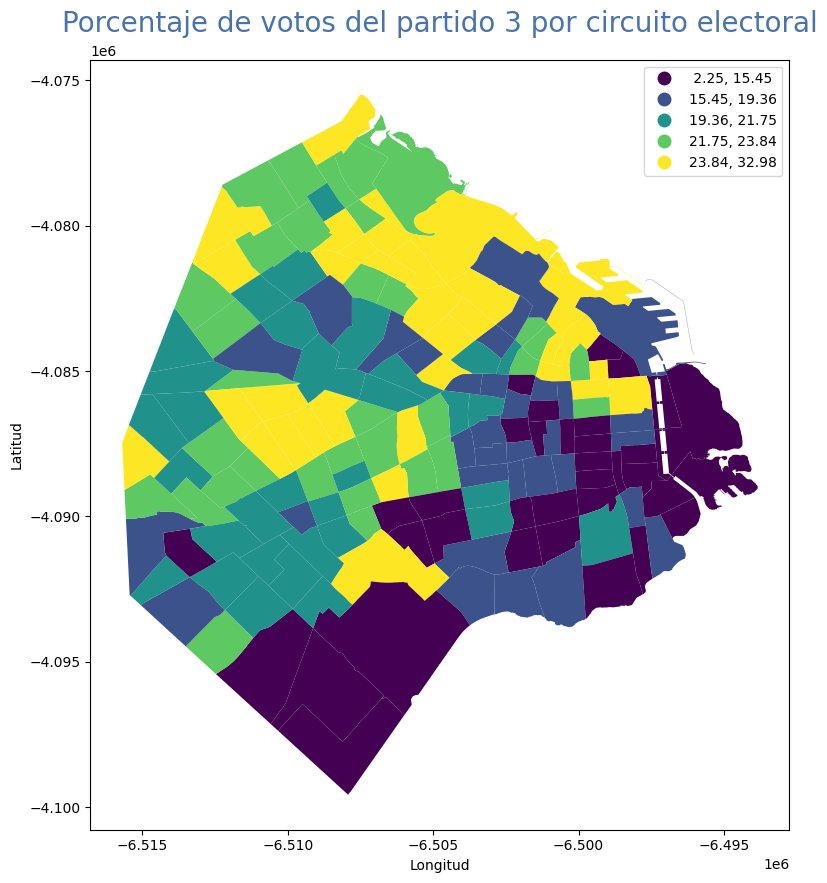

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Porcentaje de votos del partido 3 por circuito electoral', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
caba_votos_shp.plot(column='pp3', cmap='viridis',scheme='quantiles',legend=True, ax=ax, zorder=5)

Con los fines de comparar estos resultados electorales con las variables sociodemográficas estructurales, y así poder arribar a un perfil de votantes del partido 3, es que pasamos a analizar la distribución de estas variables en CABA. Para esto, necesitamos de un nuevo geodataframe que nos permita visualizar los resultados del censo por radio censal.

In [16]:
caba_totales_shp= pd.merge(caba_shp,total_votos_x_comunas, on="circuito", how="inner")
caba_totales_shp=caba_totales_shp.sort_values("circuito")
caba_totales_shp.reset_index(inplace=True)
caba_totales_shp

import branca

colormap= branca.colormap.LinearColormap(
    vmin=caba_totales_shp["total"].quantile(0.0),
    vmax=caba_totales_shp["total"].quantile(1),
    colors=["red", "orange", "lightblue", "green", "darkgreen"],
    caption="Densidad electoral de cada circuito",
)
 
import folium
from folium.features import GeoJsonPopup, GeoJsonTooltip


m = folium.Map(location=[-34.6083, -58.4212], zoom_start=11.45)

popup = GeoJsonPopup(
    fields=["circuito", "pp3"],
    aliases=["Nº Circuito: ", "Votos PP3: "],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

tooltip = GeoJsonTooltip(
    fields=["departamen", "circuito", "total", "pp3", "nv"],
    aliases=["Comuna:", "Nº Circuito:", "Votos totales: ", "Votos de PP3: ", "Votos NV"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


g = folium.GeoJson(
    caba_totales_shp,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["total"])
        if x["properties"]["pp3"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip=tooltip,
    popup=popup,
).add_to(m)

colormap.add_to(m)

m

In [17]:
radios_shp = gpd.read_file("/Users/fede/Desktop/Metodología de la OP/Competencia/COMPARTIDA/GRUPO_GANADOR/CABA_radios.shp",
    delimiter=',',       # delimitador ',',';','|','\t'
    header=0,            # número de fila como nombre de columna
    names=None,          # nombre de las columnas (ojo con header)
    index_col=0,         # que col es el índice
    usecols=None,        # que col usar. Ej: [0, 1, 2], ['foo', 'bar', 'baz']
    dtype=None,          # Tipo de col {'a': np.int32, 'b': str} 
    skiprows=None,       # saltear filas al inicio
    skipfooter=0,        # saltear filas al final
    nrows=None,          # n de filas a leer
    decimal='.',         # separador de decimal. Ej: ',' para EU dat
    quotechar='"',       # char para reconocer str
    encoding=None,
      )

radios_shp.rename({"DPTO" : "COMUNA"}, axis = 1, inplace = True) #cambie el nombre de la columna dpto por comuna para poder hacer un merge con el df que veniamos trabajando
radios_shp["COMUNA"] = radios_shp.COMUNA.str.strip("Comuna") #para sacarle la leyenda "Comuna" a la fila de comunas y que quede solo el numero
radios_shp["COMUNA"] = radios_shp["COMUNA"].apply(int)
radios_shp

DriverError: '/Users/fede/Desktop/Metodología de la OP/Competencia/COMPARTIDA/GRUPO_GANADOR/CABA_radios.shp' does not exist in the file system, and is not recognized as a supported dataset name.

A continuación, retomamos el dataframe con los resultados del censo de los votantes de CABA y le aplicamos una serie de operaciones para lograr unir los datos del censo con los radios censales.

In [ ]:
votantes["PROV"] = 2
votantes
# %%
votantes["COMUNA"] = votantes["COMUNA"].apply(str)
votantes["COMUNA"]
# %%
votantes["IDFRAC"] = votantes["IDFRAC"].apply(str)
# %%
votantes["IDRADIO"] = votantes["IDRADIO"].apply(str)

# %%
votantes["PROV"] = votantes["PROV"].apply(str)
# %%
votantes["COMUNA"] = votantes["COMUNA"].str.pad(3, side = "left", fillchar ='0')
votantes["COMUNA"]
# %%
votantes["IDFRAC"] = votantes["IDFRAC"].str.pad(2, side = "left", fillchar ='0')
votantes["IDFRAC"]
# %%
votantes["IDRADIO"] = votantes["IDRADIO"].str.pad(2, side = "left", fillchar ='0')
votantes["IDRADIO"]

# %%
votantes["PROV"] = votantes["PROV"].str.pad(2, side = "left", fillchar ='0')
votantes["PROV"]
# %%
votantes
# %%
votantes["RADIO"] = votantes.PROV.str.cat(votantes.COMUNA)
votantes
# %%
votantes["RADIO"] = votantes.RADIO.str.cat(votantes.IDFRAC)
votantes
# %%
votantes["RADIO"] = votantes.RADIO.str.cat(votantes.IDRADIO)
votantes

/var/folders/dx/qfjpv4350yl9_fr8vz7k01_c0000gn/T/ipykernel_23298/837075708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votantes["PROV"] = 2
/var/folders/dx/qfjpv4350yl9_fr8vz7k01_c0000gn/T/ipykernel_23298/837075708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votantes["COMUNA"] = votantes["COMUNA"].apply(str)
/var/folders/dx/qfjpv4350yl9_fr8vz7k01_c0000gn/T/ipykernel_23298/837075708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,COMUNA,NOMDPTO,FRAC_REF_ID,IDFRAC,RADIO_REF_ID,IDRADIO,VIVIENDA_REF_ID,TIPVV,V01,V02,...,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT,PROV,RADIO
0,001,Comuna 01 ...,1,01,1,01,1,1,1,1,...,1,2,2,13,2,4,2,1,02,020010101
1,001,Comuna 01 ...,1,01,1,01,1,1,1,1,...,1,1,2,10,2,4,1,1,02,020010101
2,001,Comuna 01 ...,1,01,1,01,1,1,1,1,...,1,1,3,14,2,7,2,1,02,020010101
3,001,Comuna 01 ...,1,01,1,01,1,1,1,1,...,1,1,2,13,2,6,1,3,02,020010101
4,001,Comuna 01 ...,1,01,1,01,1,1,1,1,...,1,1,2,5,1,4,2,1,02,020010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,3,20,2,2,1,0,02,020152113
2890147,015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,3,19,2,6,1,0,02,020152113
2890148,015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,3,17,2,2,1,0,02,020152113
2890149,015,Comuna 15 ...,351,21,3553,13,1426438,2,0,0,...,1,0,3,18,2,2,1,0,02,020152113


Una vez que unimos estos dataframe, podemos pasar a analizar la distribución de ciertas variables que consideramos de interés. En primer lugar, vamos a analizar la distribución de universitarios en CABA. Este gráfico muestra la distribución esapacial del total de universitarios en CABA, para facilitar la interpretación realizamos una división en quantiles donde cada color demuestra donde se encuentra el 25% de la población.

<AxesSubplot:title={'center':'Termino la universidad'}, xlabel='Longitud', ylabel='Latitud'>

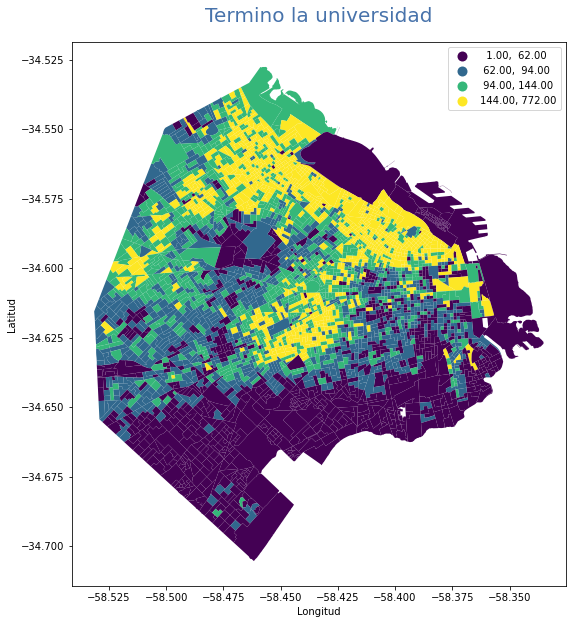

In [ ]:

termino_universidad = votantes.loc[((votantes["P09"] == 7) & (votantes["P10"] == 1))] #Seleccionamos a los que terminaron univerisdad

# %%
uni_radio_agrup = termino_universidad.groupby(["RADIO"]).count()
uni_radio_agrup

# %%
uni_radio_agrup.reset_index(inplace= True)
uni_radio_agrup

# %%
uni_radio_shp = pd.merge(radios_shp,uni_radio_agrup, on="RADIO", how="inner")
uni_radio_shp

fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Termino la universidad', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
uni_radio_shp.plot(column='P09', scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

<AxesSubplot:title={'center':'Estudiantes universitarios'}, xlabel='Longitud', ylabel='Latitud'>

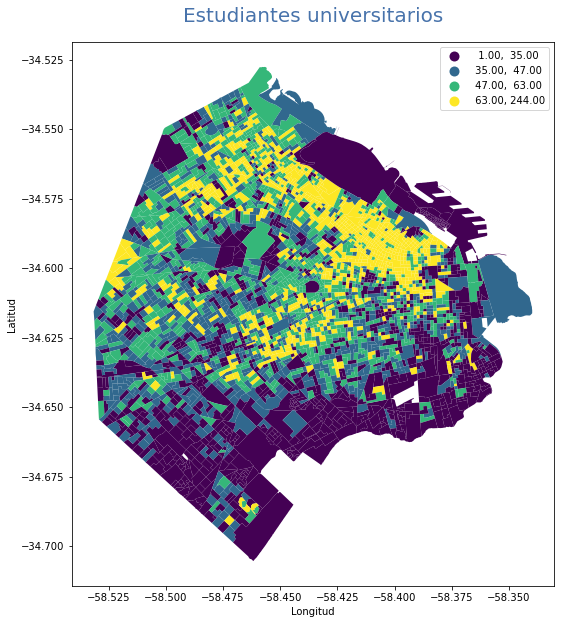

In [ ]:

estudiante_universidad = votantes.loc[((votantes["P09"] == 7) & (votantes["P10"] == 2) & (votantes["P03"] <30 ))] #Seleccionamos a los que no terminaron univerisdad. Es decir, hay estudiantes y gente que abandono, intentarmos filtrar esto haciendo que ademas sean menor de 30. Queremos encontrar jóvenes que sean univeristario 
euni_radio_agrup = estudiante_universidad.groupby(["RADIO"]).count()
euni_radio_agrup.reset_index(inplace= True)
euni_radio_shp = pd.merge(radios_shp,euni_radio_agrup, on="RADIO", how="inner")
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Estudiantes universitarios', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
euni_radio_shp.plot(column='P09',scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

<AxesSubplot:title={'center':'No terminaron el secundario y tienen más de 20'}, xlabel='Longitud', ylabel='Latitud'>

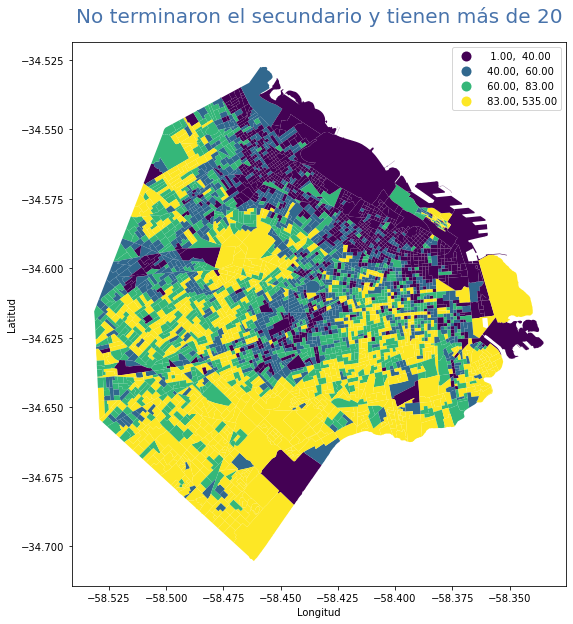

In [ ]:
# NO TERMINO SECUNDARIO
no_secundario = votantes.loc[((votantes["P09"] == 4) & (votantes["P10"] == 2) & (votantes["P03"] >20 ))] 
nosec_radio_agrup = no_secundario.groupby(["RADIO"]).count()
nosec_radio_agrup.reset_index(inplace= True)
nosec_radio_shp = pd.merge(radios_shp,nosec_radio_agrup, on="RADIO", how="inner")
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('No terminaron el secundario y tienen más de 20', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
nosec_radio_shp.plot(column='P09',scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

Luego analizamos donde se encuentran los hogares con hacinamiento, considerando a los mismos como los que tienen más de 2 personas por habitación

<AxesSubplot:title={'center':'Hacinados'}, xlabel='Longitud', ylabel='Latitud'>

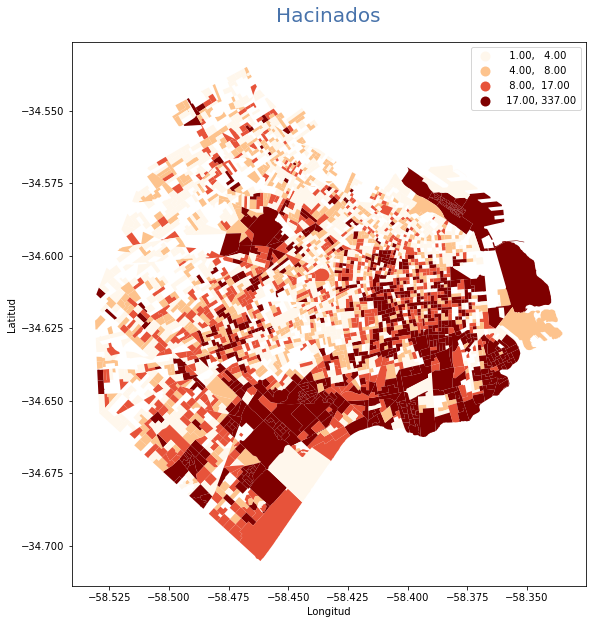

In [ ]:

hacinado_ = votantes.loc[:,"INDHAC"] == 6
hacinados = votantes[hacinado_]
hacinados

# %%
hac_radio_agrup = hacinados.groupby(["RADIO"]).count()
hac_radio_agrup

# %%
hac_radio_agrup.reset_index(inplace= True)
hac_radio_agrup

# %%
hac_radio_shp = pd.merge(radios_shp,hac_radio_agrup, on="RADIO", how="inner")
hac_radio_shp

fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Hacinados', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
hac_radio_shp.plot(column='INDHAC', cmap='OrRd',scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

<AxesSubplot:title={'center':'Solo llego a primario '}, xlabel='Longitud', ylabel='Latitud'>

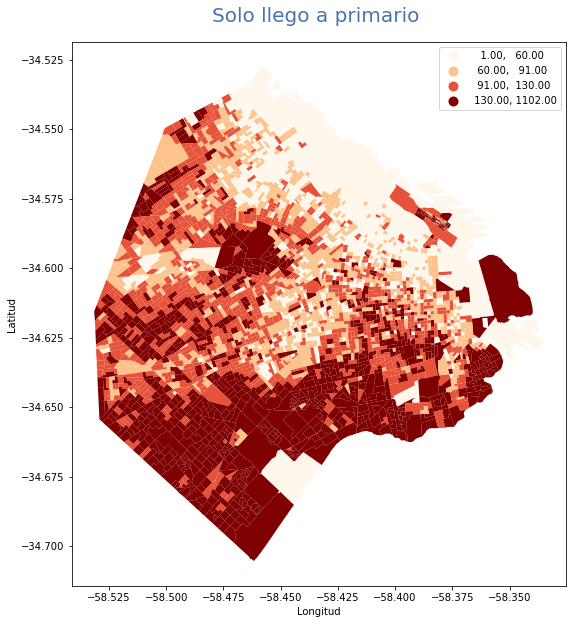

In [ ]:

primario_ = votantes.loc[:,"P09"] == 2
primario = votantes[primario_]


# %%
prim_radio_agrup = primario.groupby(["RADIO"]).count()

prim_radio_agrup.reset_index(inplace= True)

prim_radio_shp = pd.merge(radios_shp,prim_radio_agrup, on="RADIO", how="inner")


fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Solo llego a primario ', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
prim_radio_shp.plot(column='P09', cmap='OrRd',scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

<AxesSubplot:title={'center':'Jóvenes de 18 a 27 '}, xlabel='Longitud', ylabel='Latitud'>

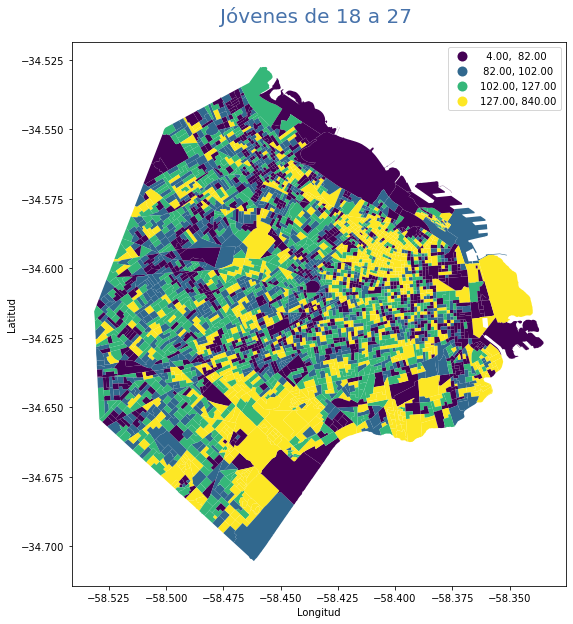

In [ ]:

jovenes_ = votantes.loc[:,"P03"] < 27
jovenes = votantes[jovenes_]


# %%
jov_radio_agrup = jovenes.groupby(["RADIO"]).count()

jov_radio_agrup.reset_index(inplace= True)

jov_radio_shp = pd.merge(radios_shp,jov_radio_agrup, on="RADIO", how="inner")


fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Jóvenes de 18 a 27 ', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
jov_radio_shp.plot(column='P03',scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

<AxesSubplot:title={'center':'Mayores de 55'}, xlabel='Longitud', ylabel='Latitud'>

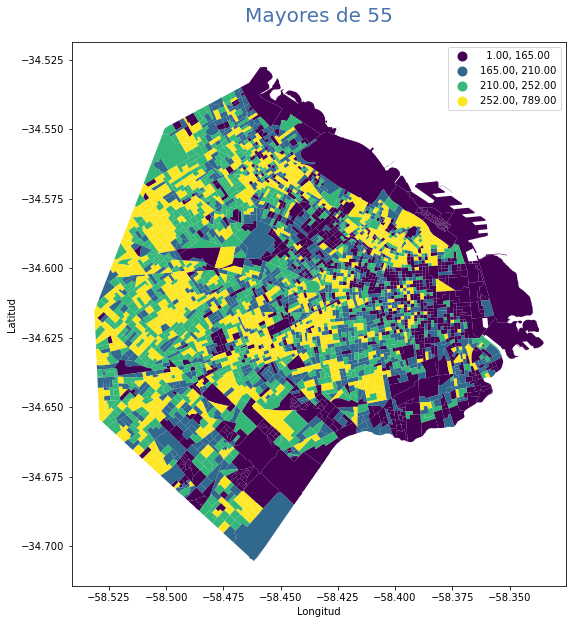

In [ ]:

nojovenes_ = votantes.loc[:,"P03"] > 55
nojovenes = votantes[nojovenes_]

njov_radio_agrup = nojovenes.groupby(["RADIO"]).count()

njov_radio_agrup.reset_index(inplace= True)

njov_radio_shp = pd.merge(radios_shp,njov_radio_agrup, on="RADIO", how="inner")


fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Mayores de 55', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
njov_radio_shp.plot(column='P03',scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

In [ ]:
votantes.CONDACT

0          1
1          1
2          1
3          3
4          1
          ..
2890146    0
2890147    0
2890148    0
2890149    0
2890150    0
Name: CONDACT, Length: 2325119, dtype: int64

In [ ]:
desempleados  = votantes.loc[((votantes["CONDACT"] == "Desocupada"))] ## NO ENCUENTRO EL CODIGO QUE DICE DESEMPLEADO = 1
des_radio_agrup = desempleados.groupby(["RADIO"]).count()
des_radio_agrup.reset_index(inplace= True)
des_radio_shp = pd.merge(radios_shp, des_radio_agrup, on="RADIO", how="inner")

fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Desempleados', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
des_radio_shp.plot(column='CONDACT',scheme='quantiles', k = 4, legend=True, ax=ax, zorder=5)

/Users/fede/opt/anaconda3/envs/Meto4OP/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:title={'center':'Desempleados'}, xlabel='Longitud', ylabel='Latitud'>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>